In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from RSI_Stock_Hist_Trend import Hist_Stock_Trnd_RSI as Syed_Hist_Trend
import warnings
warnings.filterwarnings('ignore')


In [2]:
def Prepare_Plot():
    class_init = Syed_Hist_Trend()
    dummy = class_init.getInterested_Stock()
    df = yf.download(class_init.get_stock_list(), start=class_init.get_FromDT(), end=class_init.get_ToDT(), progress=False)
    df = df[['Close']]
    df.dropna
    print('**************')
    print(class_init.get_stock_list()) 
    if df.shape[1] > 1:
        for i in class_init.get_stock_list():
            df['SMA',i] = df['Close', i].rolling(class_init.get_Period()).mean()
            df['EWM', i] = df['Close', i].ewm(span=class_init.get_Period(), adjust=False).mean()
            delta = df['Close', i].diff()
            up = delta.clip(lower=0)
            down = -1*delta.clip(upper=0)

            if(class_init.get_RSI_Method() == 'EWMA'):

                ema_up = up.ewm(com=class_init.get_Period(), adjust=False).mean()
                ema_down = down.ewm(com=class_init.get_Period(), adjust=False).mean()
                rs = ema_up/ema_down

            else:

                sma_up = up.rolling(window =class_init.get_Period()).mean()
                sma_down = down.rolling(window =class_init.get_Period()).mean()
                rs = sma_up/sma_down

            df['RSI', i] = 100 - (100/(1+rs))
            title_ ='Period Range :' + str(class_init.get_FromDT()) + ';' + str(class_init.get_ToDT()) + ' Relative Strength Index (RSI) using :' + str(class_init.get_RSI_Method()) + ' Window of ' + str(class_init.get_Period()) + ' Days'
    else:
        i = class_init.get_stock_list()[0]
        df['SMA'] = df['Close'].rolling(class_init.get_Period()).mean()
        df['EWM'] = df['Close'].ewm(span=class_init.get_Period(), adjust=False).mean()
        delta = df['Close'].diff()
        up = delta.clip(lower=0)
        down = -1*delta.clip(upper=0)

        if(class_init.get_RSI_Method() == 'EWMA'):

            ema_up = up.ewm(com=class_init.get_Period(), adjust=False).mean()
            ema_down = down.ewm(com=class_init.get_Period(), adjust=False).mean()
            rs = ema_up/ema_down

        else:

            sma_up = up.rolling(window =class_init.get_Period()).mean()
            sma_down = down.rolling(window =class_init.get_Period()).mean()
            rs = sma_up/sma_down

        df['RSI'] = 100 - (100/(1+rs))
        title_ = str(class_init.get_stock_list()[0]) + str(' || Period Range :') + str(class_init.get_FromDT()) + ';' + str(class_init.get_ToDT()) + ' Relative Strength Index (RSI) using :' + str(class_init.get_RSI_Method()) + ' Window of ' + str(class_init.get_Period()) + ' Days'

    print(title_)
    #df.to_csv('out_1.csv')

        
        
    ax = df["RSI"].plot(figsize=(20, 10))
    ax.set_title(title_, color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.set_xlabel("<----Date Period--->")
    ax.set_ylabel("RSI index")
    ax.plot()
    

Pls key in number of stocks between 1 to 10 or stock name eg. FB : Available Stocks for this excercise : [FB, AAPL, AMZN, IBM, GOOGL, MSFT, NAV, O, QCOM,TSLA]33
NUMERIC FLOW
Pls enter number between 1 - 10
Pls key in number of stocks between 1 to 10 or stock name eg. FB : Available Stocks for this excercise : [FB, AAPL, AMZN, IBM, GOOGL, MSFT, NAV, O, QCOM,TSLA]9
NUMERIC FLOW
The following stocks will be plotted :
['NAV', 'FB', 'TSLA', 'IBM', 'O', 'AAPL', 'AMZN', 'GOOGL', 'MSFT']
Would like to continue (Y) or re-enter / shuffle the list (N)? Enter (Y/N): y
Pls select method for Relative Strength Index (RSI) Calculation : Either EWMA(1) or SMA(2) method ? enter (1/2): 3
Invalid Input
Pls select method for Relative Strength Index (RSI) Calculation : Either EWMA(1) or SMA(2) method ? enter (1/2): 2
Please enter the Moving Window range between 1-50: 22
Pls enter date Range[eg. 2010-01-10;2020-01-10]. Use semi-colon(;) to seperate FromDate;ToDate or enter ctrl+v to get the default dates :20

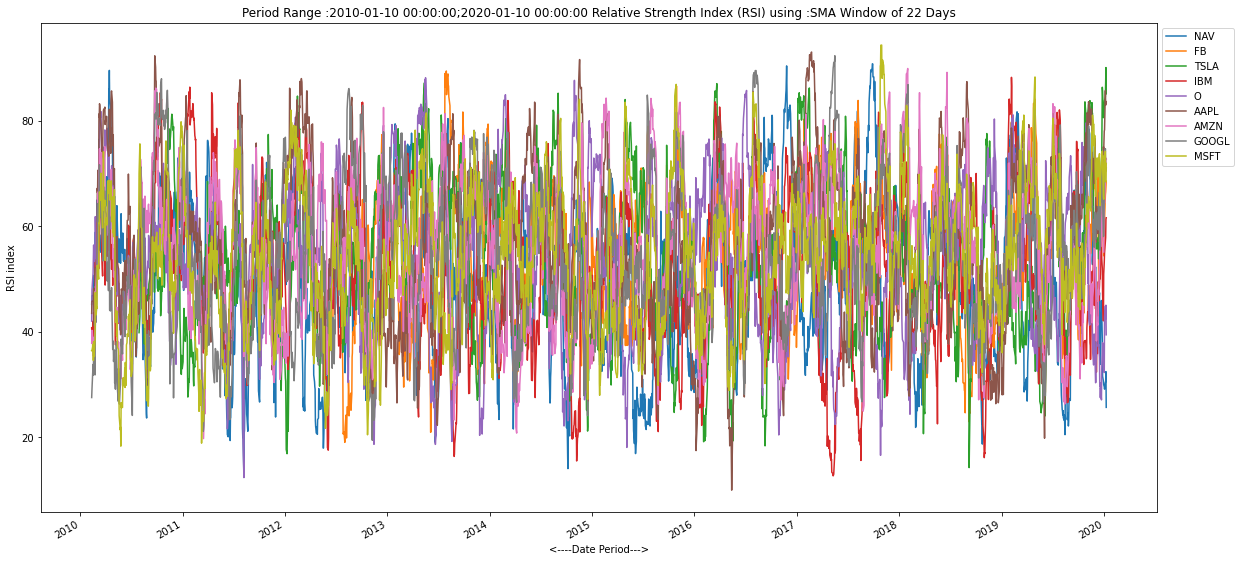

In [3]:
Prepare_Plot()